Load Data
-----

In [1]:
import pandas as pd
import numpy as np
import gmplot 
import matplotlib.pyplot as plt
from matplotlib import colors

In [173]:
crime = pd.read_csv("~/Classes/Mod2/621-introML/GroupProj/sf-crime/data/train.csv", parse_dates = ['Dates'])

In [174]:
crime

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541
5,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM UNLOCKED AUTO,Wednesday,INGLESIDE,NONE,0 Block of TEDDY AV,-122.403252,37.713431
6,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,INGLESIDE,NONE,AVALON AV / PERU AV,-122.423327,37.725138
7,2015-05-13 23:30:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Wednesday,BAYVIEW,NONE,KIRKWOOD AV / DONAHUE ST,-122.371274,37.727564
8,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,RICHMOND,NONE,600 Block of 47TH AV,-122.508194,37.776601
9,2015-05-13 23:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,CENTRAL,NONE,JEFFERSON ST / LEAVENWORTH ST,-122.419088,37.807802


In [224]:
labels = crime['Category'].unique()
# len(labels)
labels

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'], dtype=object)

Label crimes to 4 types
-----

In [225]:
# Re-label crimes that belong in the same category
crime['Category'].replace('TREA', 'TREASON', inplace=True)

Personal= ["ASSAULT",'SEX OFFENSES FORCIBLE','MISSING PERSON','KIDNAPPING', 'ARSON', 'FAMILY OFFENSES', 
                   'SUICIDE','SEX OFFENSES NON FORCIBLE', 'RECOVERED VEHICLE']
     
Property= ["BURGLARY",'LARCENY/THEFT', "STOLEN PROPERTY", "ROBBERY", "VEHICLE THEFT", 'VANDALISM']
    
Statutory = ['WARRANTS', 'SUSPICIOUS OCC', 'TRESPASS',"DRUG/NARCOTIC",'DRUNKENNESS', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
              "PROSTITUTION",'DISORDERLY CONDUCT','LIQUOR LAWS', 'LOITERING','GAMBLING', 'PORNOGRAPHY/OBSCENE MAT','WEAPON LAWS']
     # crime['type'].unique()

Financial_n_Other=['OTHER OFFENSES','FORGERY/COUNTERFEITING','SECONDARY CODES','FRAUD','BRIBERY','TREASON',
                   'EMBEZZLEMENT', 'EXTORTION', 'BAD CHECKS','NON-CRIMINAL']

# a = Personal+Property+Statutory+Financial_n_Other
# [x for x in a if x not in labels]


['TREASON']

In [227]:
#### haven't figure out another way to add a separate column as "type"

crime['type'] = crime.Category.replace(Personal, "Personal").replace(Property, "Property").replace(Statutory, "Statutory").replace(Financial_n_Other, "Financial or Other")

# crime['type'].unique()
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,type
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,Statutory
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,Financial or Other
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,Financial or Other
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,Property
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,Property


In [230]:
plt.hist(crime.type)  ## keep freezing on my laptop  --W.X

(array([ 93334.,  23877.,  21770.,  90503.,  76179.,  95079., 142619.,
        108657.,  94169., 131862.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

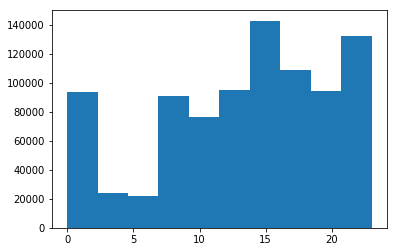

In [91]:
plt.hist(crime.Dates.dt.hour, normed=False)   ### time

In [30]:
# gmap = gmplot.GoogleMapPlotter(-125, 38, 10)

In [231]:
crime_map = crime[(crime.Y<38) & (crime.X<-122)]   

## some XY recorded mistakenly, but districts info correct, so keep for modeling but not for plotting map.

(array([ 42892.,  61829.,  63246.,  53928.,  92319., 118465., 283175.,
        110569.,  49834.,   1725.]),
 array([37.70787902, 37.71908867, 37.73029832, 37.74150796, 37.75271761,
        37.76392726, 37.7751369 , 37.78634655, 37.7975562 , 37.80876585,
        37.81997549]),
 <a list of 10 Patch objects>)

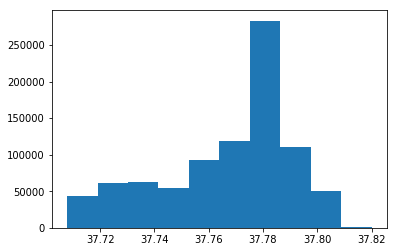

In [87]:
# plt.hist(crime_map.Y, normed=False)

(array([ 12897.,  18658.,  32988.,  41148.,  65558., 117409., 309010.,
        213535.,  59996.,   6783.]),
 array([-122.51364206, -122.49877161, -122.48390115, -122.46903069,
        -122.45416024, -122.43928978, -122.42441932, -122.40954887,
        -122.39467841, -122.37980795, -122.36493749]),
 <a list of 10 Patch objects>)

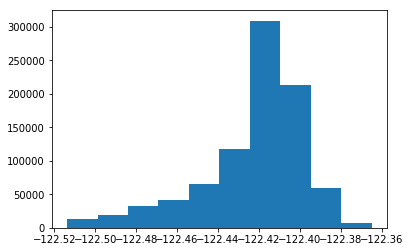

In [88]:
# plt.hist(crime_map.X, normed=False)


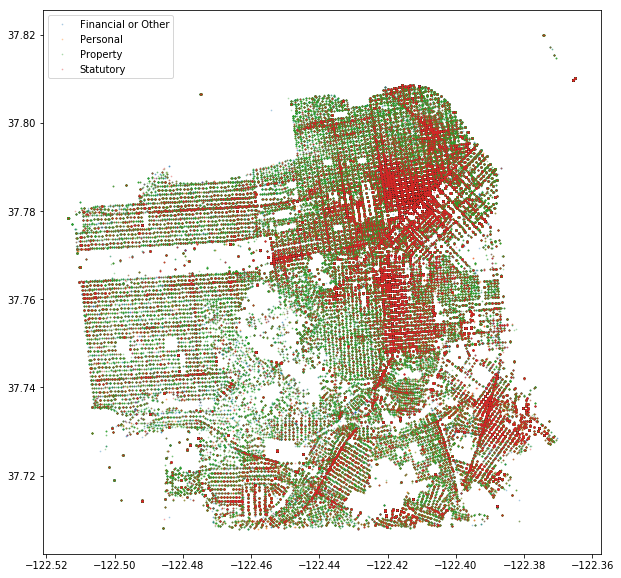

In [237]:
groups = crime_map.groupby('type')
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.X, group.Y, marker='.', linestyle='', alpha=0.3,
            ms=1.5, label=name)
plt.legend()

plt.show()